这里采用xgboost进行回归预测，首先是import相关的库

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

这里使用pandas读取csv，而后划分训练集和验证集

In [2]:
data = pd.read_csv('./train.csv')
X = data.T
X = X[1:385]
X = X.T
Y = data['reference']
tdata = pd.read_csv('./test.csv')
pre_X = tdata.T
pre_X = pre_X[1:385]
pre_X = pre_X.T

In [253]:
X = X.drop(['value253'], axis=1)

In [254]:
xtrain = X.head(20000)
ytrain = Y.head(20000)

In [255]:
xtest = X.tail(5000)
ytest = Y.tail(5000)

In [256]:
dtrain = xgb.DMatrix(xtrain, label = ytrain)
dtest = xgb.DMatrix(xtest, label = ytest)

In [257]:
watchlist = [(dtrain, 'train'), (dtest, 'test')]

设置参数和迭代次数

In [267]:
params = { 'eat':0.01,
            'objective':'reg:linear',
         'max_depth':6}
num_round = 500

开始训练

In [268]:
model = xgb.train(params, dtrain, num_round, evals=watchlist)

[0]	train-rmse:36.7053	test-rmse:37.0824
[1]	train-rmse:26.3694	test-rmse:26.6613
[2]	train-rmse:19.195	test-rmse:19.4094
[3]	train-rmse:14.2067	test-rmse:14.386
[4]	train-rmse:10.8896	test-rmse:11.0555
[5]	train-rmse:8.66248	test-rmse:8.8069
[6]	train-rmse:7.16339	test-rmse:7.28643
[7]	train-rmse:6.10247	test-rmse:6.22851
[8]	train-rmse:5.42554	test-rmse:5.62859
[9]	train-rmse:4.97	test-rmse:5.1948
[10]	train-rmse:4.68098	test-rmse:4.96654
[11]	train-rmse:4.40521	test-rmse:4.73457
[12]	train-rmse:4.22945	test-rmse:4.61561
[13]	train-rmse:4.04127	test-rmse:4.45438
[14]	train-rmse:3.8654	test-rmse:4.33235
[15]	train-rmse:3.75303	test-rmse:4.26139
[16]	train-rmse:3.67302	test-rmse:4.21807
[17]	train-rmse:3.51509	test-rmse:4.13218
[18]	train-rmse:3.40959	test-rmse:4.06716
[19]	train-rmse:3.35072	test-rmse:4.03763
[20]	train-rmse:3.26308	test-rmse:3.97984
[21]	train-rmse:3.21821	test-rmse:3.95525
[22]	train-rmse:3.16553	test-rmse:3.94562
[23]	train-rmse:3.13892	test-rmse:3.93025
[24]	train

[195]	train-rmse:0.962008	test-rmse:2.76781
[196]	train-rmse:0.960585	test-rmse:2.76606
[197]	train-rmse:0.955463	test-rmse:2.76529
[198]	train-rmse:0.953422	test-rmse:2.76469
[199]	train-rmse:0.950412	test-rmse:2.76326
[200]	train-rmse:0.945872	test-rmse:2.76242
[201]	train-rmse:0.941007	test-rmse:2.75893
[202]	train-rmse:0.940166	test-rmse:2.7586
[203]	train-rmse:0.938006	test-rmse:2.7604
[204]	train-rmse:0.93644	test-rmse:2.76069
[205]	train-rmse:0.934172	test-rmse:2.76013
[206]	train-rmse:0.932106	test-rmse:2.75942
[207]	train-rmse:0.93042	test-rmse:2.75889
[208]	train-rmse:0.927573	test-rmse:2.75954
[209]	train-rmse:0.926305	test-rmse:2.75944
[210]	train-rmse:0.922249	test-rmse:2.75759
[211]	train-rmse:0.917994	test-rmse:2.75716
[212]	train-rmse:0.916705	test-rmse:2.75673
[213]	train-rmse:0.913404	test-rmse:2.75543
[214]	train-rmse:0.909398	test-rmse:2.7548
[215]	train-rmse:0.907454	test-rmse:2.75506
[216]	train-rmse:0.905657	test-rmse:2.75493
[217]	train-rmse:0.903863	test-rmse:2

[383]	train-rmse:0.532083	test-rmse:2.69058
[384]	train-rmse:0.530778	test-rmse:2.69017
[385]	train-rmse:0.530071	test-rmse:2.68996
[386]	train-rmse:0.5294	test-rmse:2.68994
[387]	train-rmse:0.528297	test-rmse:2.69036
[388]	train-rmse:0.52734	test-rmse:2.69021
[389]	train-rmse:0.525358	test-rmse:2.69002
[390]	train-rmse:0.52369	test-rmse:2.68903
[391]	train-rmse:0.522133	test-rmse:2.68917
[392]	train-rmse:0.521201	test-rmse:2.6892
[393]	train-rmse:0.518975	test-rmse:2.68868
[394]	train-rmse:0.516526	test-rmse:2.68895
[395]	train-rmse:0.514933	test-rmse:2.6889
[396]	train-rmse:0.513141	test-rmse:2.68909
[397]	train-rmse:0.511318	test-rmse:2.68891
[398]	train-rmse:0.510017	test-rmse:2.68874
[399]	train-rmse:0.508892	test-rmse:2.68867
[400]	train-rmse:0.507058	test-rmse:2.68868
[401]	train-rmse:0.505643	test-rmse:2.68835
[402]	train-rmse:0.505133	test-rmse:2.68819
[403]	train-rmse:0.504386	test-rmse:2.68804
[404]	train-rmse:0.503755	test-rmse:2.688
[405]	train-rmse:0.501187	test-rmse:2.68

训练完成以后，查看各特征的重要性

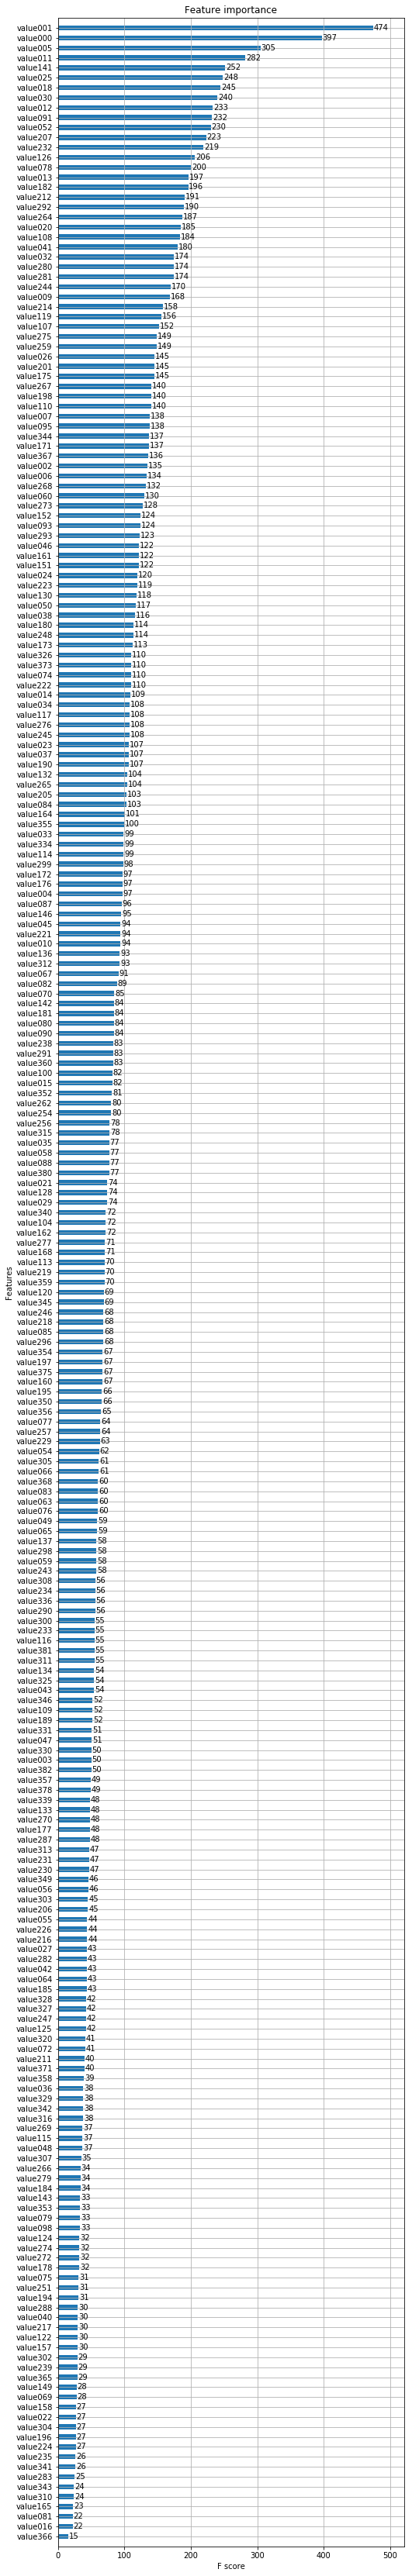

In [269]:
fig, ax = plt.subplots(1, 1, figsize=(8, 60))
xgb.plot_importance(model, height=0.5, ax=ax)

对测试集进行预测

In [22]:
pre_Y = model.predict(dtest)
pre_Y

array([28.595411, 21.942547, 68.03143 , ..., 20.22207 , 67.54595 ,
       43.329987], dtype=float32)

将预测的结果组织成相应的格式

In [15]:
id_ = np.array(range(0, 25000))
result = pd.DataFrame({'id':id_,
                      'reference':pre_Y})
result

,id,reference
0,0,29.108284
1,1,21.853598
2,2,68.209114
3,3,54.939835
4,4,53.511501
5,5,67.510231
6,6,46.443439
7,7,90.624069
8,8,23.291492
9,9,51.572327


存为csv格式提交

In [16]:
result.to_csv('result30.csv', index = False)

下面是利用sklearn提供的GridSearchCV进行参数调整，具体操作详见[调参](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)

In [80]:
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(X, Y)
evalute_result = optimized_GBM.grid_scores_
print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed: 85.3min finished


每轮迭代运行结果:[mean: 0.99455, std: 0.00044, params: {'learning_rate': 0.01}, mean: 0.99539, std: 0.00050, params: {'learning_rate': 0.05}, mean: 0.99505, std: 0.00052, params: {'learning_rate': 0.07}, mean: 0.99467, std: 0.00049, params: {'learning_rate': 0.1}, mean: 0.99228, std: 0.00057, params: {'learning_rate': 0.2}]
参数的最佳取值：{'learning_rate': 0.05}
最佳模型得分:0.9953865757028528


D:\Anaconda3\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
